# Imported Libraries

In [1]:
import pandas as pd
import unicodedata
import sys
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from yellowbrick.classifier import ROCAUC
from sklearn.ensemble import RandomForestClassifier

# Step 1

In [2]:
# reading the tsv file into a data frame
# tsv = tab separated values file
train_df = pd.read_csv("labeledTrainData.tsv", sep = "\t")

In [3]:
# display the first 5 rows to make sure it worked
train_df.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


## Making All Letters Lowercase

In [4]:
# create text into lowercase letters
train_df['review'] = train_df['review'].str.lower()

In [5]:
train_df.head()

,id,sentiment,review
0,5814_8,1,with all this stuff going down at the moment w...
1,2381_9,1,"\the classic war of the worlds\"" by timothy hi..."
2,7759_3,0,the film starts with a manager (nicholas bell)...
3,3630_4,0,it must be assumed that those who praised this...
4,9495_8,1,superbly trashy and wondrously unpretentious 8...


In [6]:
train_df['review'][0]

"with all this stuff going down at the moment with mj i've started listening to his music, watching the odd documentary here and there, watched the wiz and watched moonwalker again. maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. some of it has subtle messages about mj's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />visually impressive but of course this is all about michael jackson so unless you remotely like mj in anyway then you are going to hate this and find it boring. some may call mj an egotist for consenting to the making of this movie but mj and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />the actual feature film bit when it finally sta

## Removing Punctuation

In [7]:
# remove punctuation and special characters from review column
train_df['review'] = train_df['review'].str.replace(r'[^\w\s]+', ' ')

C:\Users\Alan Donahue\AppData\Local\Temp\ipykernel_1280\1387201825.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_df['review'] = train_df['review'].str.replace(r'[^\w\s]+', ' ')


In [8]:
train_df.head()

,id,sentiment,review
0,5814_8,1,with all this stuff going down at the moment w...
1,2381_9,1,the classic war of the worlds by timothy hin...
2,7759_3,0,the film starts with a manager nicholas bell ...
3,3630_4,0,it must be assumed that those who praised this...
4,9495_8,1,superbly trashy and wondrously unpretentious 8...


## Removing Numbers

In [9]:
# checking to see where the number is in the first entry
train_df["review"][0]

'with all this stuff going down at the moment with mj i ve started listening to his music  watching the odd documentary here and there  watched the wiz and watched moonwalker again  maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  some of it has subtle messages about mj s feeling towards the press and also the obvious message of drugs are bad m kay br  br  visually impressive but of course this is all about michael jackson so unless you remotely like mj in anyway then you are going to hate this and find it boring  some may call mj an egotist for consenting to the making of this movie but mj and most of his fans would say that he made it for the fans which if true is really nice of him br  br  the actual feature film bit when it finally starts is o

In [10]:
# removing the numbers in all entries of the review column
train_df['no_num_review'] = train_df["review"].apply(lambda x: ''.join([i for i in x if not i.isdigit()]))

In [11]:
# checking to see if it worked by looking for the 20 that was originally in the entry
train_df['no_num_review'][0]

'with all this stuff going down at the moment with mj i ve started listening to his music  watching the odd documentary here and there  watched the wiz and watched moonwalker again  maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  some of it has subtle messages about mj s feeling towards the press and also the obvious message of drugs are bad m kay br  br  visually impressive but of course this is all about michael jackson so unless you remotely like mj in anyway then you are going to hate this and find it boring  some may call mj an egotist for consenting to the making of this movie but mj and most of his fans would say that he made it for the fans which if true is really nice of him br  br  the actual feature film bit when it finally starts is o

## Removing English Stop Words

In [12]:
# saving all the english stop words
stop = stopwords.words('english')

In [13]:
# remove all words that show up in the stop variable
train_df['review_no_stop'] = train_df['no_num_review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [14]:
# checking to see if it worked correctly
train_df.head()

,id,sentiment,review,no_num_review,review_no_stop
0,5814_8,1,with all this stuff going down at the moment w...,with all this stuff going down at the moment w...,stuff going moment mj started listening music ...
1,2381_9,1,the classic war of the worlds by timothy hin...,the classic war of the worlds by timothy hin...,classic war worlds timothy hines entertaining ...
2,7759_3,0,the film starts with a manager nicholas bell ...,the film starts with a manager nicholas bell ...,film starts manager nicholas bell giving welco...
3,3630_4,0,it must be assumed that those who praised this...,it must be assumed that those who praised this...,must assumed praised film greatest filmed oper...
4,9495_8,1,superbly trashy and wondrously unpretentious 8...,superbly trashy and wondrously unpretentious ...,superbly trashy wondrously unpretentious explo...


## Stemming Words

In [15]:
# need to tokenize the words before I'm able to stem them
train_df['review_tok'] = train_df['review_no_stop'].apply(word_tokenize)

In [16]:
# making sure the tokenization worked
train_df.head()

,id,sentiment,review,no_num_review,review_no_stop,review_tok
0,5814_8,1,with all this stuff going down at the moment w...,with all this stuff going down at the moment w...,stuff going moment mj started listening music ...,"[stuff, going, moment, mj, started, listening,..."
1,2381_9,1,the classic war of the worlds by timothy hin...,the classic war of the worlds by timothy hin...,classic war worlds timothy hines entertaining ...,"[classic, war, worlds, timothy, hines, enterta..."
2,7759_3,0,the film starts with a manager nicholas bell ...,the film starts with a manager nicholas bell ...,film starts manager nicholas bell giving welco...,"[film, starts, manager, nicholas, bell, giving..."
3,3630_4,0,it must be assumed that those who praised this...,it must be assumed that those who praised this...,must assumed praised film greatest filmed oper...,"[must, assumed, praised, film, greatest, filme..."
4,9495_8,1,superbly trashy and wondrously unpretentious 8...,superbly trashy and wondrously unpretentious ...,superbly trashy wondrously unpretentious explo...,"[superbly, trashy, wondrously, unpretentious, ..."


In [17]:
# create the stemmer
porter = PorterStemmer()

In [18]:
# stemmed the words using porter stem
# used the apply function and lambda function to iterate through the column
train_df['review_stemmed'] = train_df['review_tok'].apply(lambda x: [porter.stem(word) for word in x])

In [19]:
# checking to make sure it works
train_df.head()

,id,sentiment,review,no_num_review,review_no_stop,review_tok,review_stemmed
0,5814_8,1,with all this stuff going down at the moment w...,with all this stuff going down at the moment w...,stuff going moment mj started listening music ...,"[stuff, going, moment, mj, started, listening,...","[stuff, go, moment, mj, start, listen, music, ..."
1,2381_9,1,the classic war of the worlds by timothy hin...,the classic war of the worlds by timothy hin...,classic war worlds timothy hines entertaining ...,"[classic, war, worlds, timothy, hines, enterta...","[classic, war, world, timothi, hine, entertain..."
2,7759_3,0,the film starts with a manager nicholas bell ...,the film starts with a manager nicholas bell ...,film starts manager nicholas bell giving welco...,"[film, starts, manager, nicholas, bell, giving...","[film, start, manag, nichola, bell, give, welc..."
3,3630_4,0,it must be assumed that those who praised this...,it must be assumed that those who praised this...,must assumed praised film greatest filmed oper...,"[must, assumed, praised, film, greatest, filme...","[must, assum, prais, film, greatest, film, ope..."
4,9495_8,1,superbly trashy and wondrously unpretentious 8...,superbly trashy and wondrously unpretentious ...,superbly trashy wondrously unpretentious explo...,"[superbly, trashy, wondrously, unpretentious, ...","[superbl, trashi, wondrous, unpretenti, exploi..."


## Putting stemmed words into a string

In [20]:
# need to create one string from list for bag of words matrix to work
# reversing the tokenization
train_df['stem_sen'] = train_df['review_stemmed'].apply(lambda x: ' '.join([word for word in x]))

In [21]:
# making sure it worked correctly
train_df.head()

,id,sentiment,review,no_num_review,review_no_stop,review_tok,review_stemmed,stem_sen
0,5814_8,1,with all this stuff going down at the moment w...,with all this stuff going down at the moment w...,stuff going moment mj started listening music ...,"[stuff, going, moment, mj, started, listening,...","[stuff, go, moment, mj, start, listen, music, ...",stuff go moment mj start listen music watch od...
1,2381_9,1,the classic war of the worlds by timothy hin...,the classic war of the worlds by timothy hin...,classic war worlds timothy hines entertaining ...,"[classic, war, worlds, timothy, hines, enterta...","[classic, war, world, timothi, hine, entertain...",classic war world timothi hine entertain film ...
2,7759_3,0,the film starts with a manager nicholas bell ...,the film starts with a manager nicholas bell ...,film starts manager nicholas bell giving welco...,"[film, starts, manager, nicholas, bell, giving...","[film, start, manag, nichola, bell, give, welc...",film start manag nichola bell give welcom inve...
3,3630_4,0,it must be assumed that those who praised this...,it must be assumed that those who praised this...,must assumed praised film greatest filmed oper...,"[must, assumed, praised, film, greatest, filme...","[must, assum, prais, film, greatest, film, ope...",must assum prais film greatest film opera ever...
4,9495_8,1,superbly trashy and wondrously unpretentious 8...,superbly trashy and wondrously unpretentious ...,superbly trashy wondrously unpretentious explo...,"[superbly, trashy, wondrously, unpretentious, ...","[superbl, trashi, wondrous, unpretenti, exploi...",superbl trashi wondrous unpretenti exploit hoo...


In [22]:
# storing correct first entry from the Team's post as ans
ans = "stuff go moment mj start listen music watch odd documentari watch wiz watch moonwalk mayb want get certain insight guy thought realli cool eighti mayb make mind whether guilti innoc moonwalk part biographi part featur film rememb go see cinema origin releas subtl messag mj feel toward press also obviou messag drug bad kay br br visual impress cours michael jackson unless remot like mj anyway go hate find bore may call mj egotist consent make movi mj fan would say made fan true realli nice br br actual featur film bit final start minut exclud smooth crimin sequenc joe pesci convinc psychopath power drug lord want mj dead bad beyond mj overheard plan nah joe pesci charact rant want peopl know suppli drug etc dunno mayb hate mj music br br lot cool thing like mj turn car robot whole speed demon sequenc also director must patienc saint came film kiddi bad sequenc usual director hate work one kid let alon whole bunch perform complex danc scene br br bottom line movi peopl like mj one level anoth think peopl stay away tri give wholesom messag iron mj bestest buddi movi girl michael jackson truli one talent peopl ever grace planet guilti well attent gave subject hmmm well know peopl differ behind close door know fact either extrem nice stupid guy one sickest liar hope latter"

In [23]:
# comparing the correct first entry to my first entry to ensure the preprocessing is done correctly
if train_df['stem_sen'][0] == ans:
    print("success")
else:
    print("failure")

success


# Step 2

In [24]:
# cleaning the dataframe before spliting 
clean_df = train_df.drop(columns = ["review", "no_num_review", "review_no_stop", "review_tok", "review_stemmed"], axis = 1)

In [25]:
# checking to make sure it worked correctly
clean_df.head()

,id,sentiment,stem_sen
0,5814_8,1,stuff go moment mj start listen music watch od...
1,2381_9,1,classic war world timothi hine entertain film ...
2,7759_3,0,film start manag nichola bell give welcom inve...
3,3630_4,0,must assum prais film greatest film opera ever...
4,9495_8,1,superbl trashi wondrous unpretenti exploit hoo...


In [26]:
# removing sentiment as sentiment column is the target
# feature dataframe
x = clean_df.stem_sen

In [27]:
# double checking that it worked correctly
x.head()

0    stuff go moment mj start listen music watch od...
1    classic war world timothi hine entertain film ...
2    film start manag nichola bell give welcom inve...
3    must assum prais film greatest film opera ever...
4    superbl trashi wondrous unpretenti exploit hoo...
Name: stem_sen, dtype: object

In [28]:
# target for splitting
y = clean_df['sentiment']
y.head()

0    1
1    1
2    0
3    0
4    1
Name: sentiment, dtype: int64

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# Step 3

In [30]:
# creating the tfidf
tfidf = TfidfVectorizer()

In [31]:
# fit and applying the tf-idf vectorizer
tf_train = tfidf.fit_transform(x_train)

# Step 4

In [32]:
# fitting the tf-idf vectorizer
tf_test = tfidf.transform(x_test)

For step 3, I am fitting and applying the tf-dif vectorization on the training set. This gets all the vocabulary, every word, from the movie reviews in the training set. I am only applying the tf-idf vectorization on the testing set because I only want to use the vocab from the training set. This will ignore new words in the testing set. I want to do it this way because I'm not trying to retrain the model with the testing set. I am trying to predict the sentiment value of the test set reviews based off the training set vocab.

# Step 5

In [33]:
# creating logistic regression object
logistic_regression = LogisticRegression(random_state = 0)

In [34]:
# training the model using the vectorized training feature and the training target
model = logistic_regression.fit(tf_train, y_train)

# Step 6

In [35]:
# running the model against the test set that was transformed
sentiment_pred = model.predict(tf_test)

In [36]:
# finding the accuracy of the model
# model is 88.88% accurate
accuracy = (accuracy_score(y_test, sentiment_pred)) * 100
accuracy

88.94

# Step 7

In [37]:
# creating the confusion matrix for the test set predictions
matrix = confusion_matrix(y_test, sentiment_pred)
matrix

array([[2169,  334],
       [ 219, 2278]], dtype=int64)

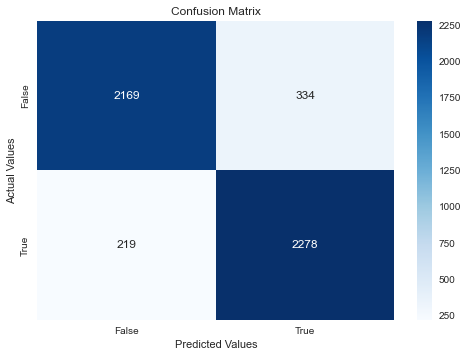

In [38]:
# displaying the confusion matrix with a heatmap
ax = sns.heatmap(matrix, annot = True, cmap = "Blues", fmt = "d")
ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted Values")
ax.set_ylabel("Actual Values")

ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])
plt.show()

# Step 8

In [39]:
# calculating the precision/recall/f1-score for the test prediction
target_names = ['negative', 'positive']
print(classification_report(y_test, sentiment_pred, target_names = target_names))

              precision    recall  f1-score   support

    negative       0.91      0.87      0.89      2503
    positive       0.87      0.91      0.89      2497

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



# Step 9

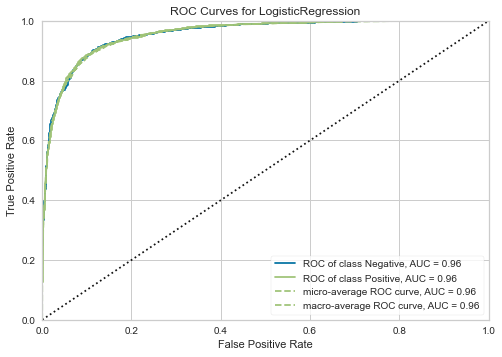

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [40]:
# creating ROC curve for the test data
# created labels to make sure it is properly labeled
labels = {0: "Negative", 1: "Positive"}
roc_curve = ROCAUC(model, encoder = labels, solver = "liblinear")

roc_curve.fit(tf_test, y_test)
roc_curve.score(tf_test, y_test)
roc_curve.show()

# Step 10

## Training Random Forest Model

In [41]:
# creating the random forest classifier object
randomforest = RandomForestClassifier(random_state = 0, n_jobs = -1)

In [42]:
# training the model
model2 = randomforest.fit(tf_train, y_train)

## Model Accuracy

In [43]:
# using the random forest model to predict
sent_forest_pred = model2.predict(tf_test)

In [44]:
# checking the accuracy of the model
forest_accuracy = (accuracy_score(y_test, sent_forest_pred)) * 100
forest_accuracy

84.74000000000001

## Confusion Matrix

In [45]:
# creating a confusion matrix 
forest_matrix = confusion_matrix(y_test, sent_forest_pred)
forest_matrix

array([[2097,  406],
       [ 357, 2140]], dtype=int64)

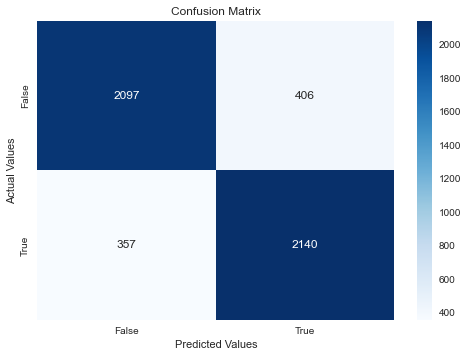

In [46]:
# displaying the confusion matrix with a heatmap
ax = sns.heatmap(forest_matrix, annot = True, cmap = "Blues", fmt = "d")
ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted Values")
ax.set_ylabel("Actual Values")

ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])
plt.show()

## Precision / Recall / F1-Score

In [47]:
# calculating the precision/recall/f1-score for the test prediction
target_names = ['negative', 'positive']
print(classification_report(y_test, sent_forest_pred, target_names = target_names))

              precision    recall  f1-score   support

    negative       0.85      0.84      0.85      2503
    positive       0.84      0.86      0.85      2497

    accuracy                           0.85      5000
   macro avg       0.85      0.85      0.85      5000
weighted avg       0.85      0.85      0.85      5000



## ROC Curve

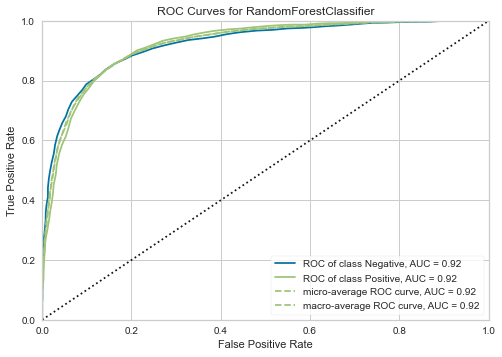

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [48]:
# creating ROC curve for the test data
# created labels to make sure it is properly labeled
labels = {0: "Negative", 1: "Positive"}
roc_curve = ROCAUC(model2, encoder = labels, solver = "liblinear")

roc_curve.fit(tf_test, y_test)
roc_curve.score(tf_test, y_test)
roc_curve.show()